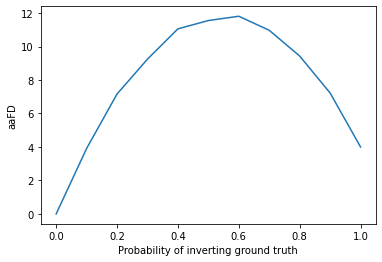

In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
from edesdetectrl.metrics import soft_average_absolute_frame_difference

ground_truths = [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

# What's the aaFD for sequences where we randomly invert the ground truth values with probability p?
def randomly_swap(xs, p):
    new_xs = []
    for x in xs:
        if p < random.random():
            new_xs.append(x)
        else:
            new_xs.append(1 - x)
    return new_xs


probs = np.linspace(0, 1, 11)
aafds = []
n = 1000
for p in probs:
    aafd = 0
    for _ in range(n):
        predictions = randomly_swap(ground_truths, p)
        aafd += soft_average_absolute_frame_difference(ground_truths, predictions)
    aafds.append(aafd / n)

plt.xlabel("Probability of inverting ground truth")
plt.ylabel("aaFD")
plt.plot(probs, aafds)
